<a href="https://colab.research.google.com/github/vicaleram/DSPS_VRamirez/blob/master/HW12/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [0]:
from tensorflow import keras
import pylab as pl
import numpy as np
np.random.seed(104049)

# Import Data

In [3]:
(train_input, train_labels), (test_input,
                              test_labels) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# Understanding

## Task 1

In [4]:
print("The train input shape is", train_input.shape, '\n',
      "and the labels shape is", train_labels.shape)

The train input shape is (60000, 28, 28) 
 and the labels shape is (60000,)


## Task 2

In [5]:
print("the label of the 10th observation is", train_labels[9])

the label of the 10th observation is 4


## Task 3

In [6]:
print("train_input[1].shape: ", train_input[1].shape)

train_input[1].shape:  (28, 28)


## Task 4

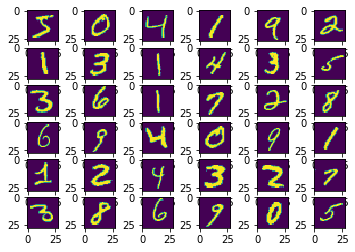

In [7]:
imax = 6
for i in range(imax):
    for j in range(imax):
        pl.subplot(imax,imax,i*imax+j+1)
        pl.imshow(train_input[i*imax+j])

# Model

## Task 5

In [8]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(128, activation=tf.nn.sigmoid),
                         keras.layers.Dense(10,activation=tf.nn.softmax)])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


# Hyperparameters

## Task 6

In [0]:
model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(train_input, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.6485 - acc: 0.8378
Epoch 2/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3593 - acc: 0.9039
Epoch 3/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3117 - acc: 0.9138
Epoch 4/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2818 - acc: 0.9215
Epoch 5/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2628 - acc: 0.9262


## Task 7

In [12]:
test_loss, test_acc = model.evaluate(test_input, test_labels)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.2463 - acc: 0.9317


## Task 8

In [13]:
pred = model.predict(test_input, verbose=1)

10000/10000 [==============================] - 0s 28us/sample


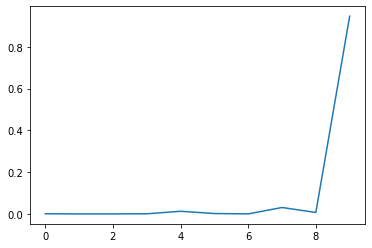

In [14]:
pl.plot(pred[9])

## Task 9

In [15]:
for i, pre in enumerate(pred):
    if np.argmax(pre) != test_labels[i]:
        print(i)
        firstfail = i
        break

8


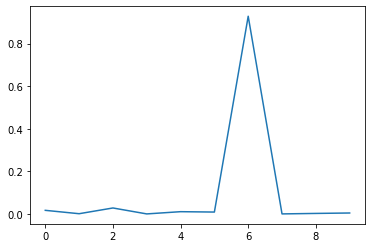

In [16]:
pl.plot(pred[firstfail])

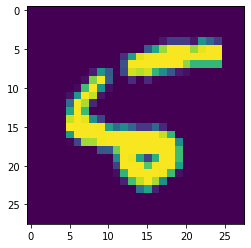

In [17]:
pl.imshow(test_input[firstfail])

In [18]:
test_labels[firstfail]

5

It makes sense that this is a wrong prediction since the number is even hard to tell just by looking at it, therefore the model must have had a hard time classifying it.

## Task 10

In [0]:
model10 = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(128, activation=tf.nn.sigmoid),
                         keras.layers.Dense(128, activation=tf.nn.sigmoid),
                         keras.layers.Dense(128, activation=tf.nn.sigmoid),
                         keras.layers.Dense(128, activation=tf.nn.sigmoid),
                         keras.layers.Dense(10,activation=tf.nn.softmax)])

In [20]:
model10.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model10.fit(train_input, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 84us/sample - loss: 2.2988 - acc: 0.1233
Epoch 2/5
60000/60000 [==============================] - 5s 78us/sample - loss: 2.2770 - acc: 0.1762
Epoch 3/5
60000/60000 [==============================] - 5s 77us/sample - loss: 2.2021 - acc: 0.2864
Epoch 4/5
60000/60000 [==============================] - 5s 79us/sample - loss: 1.8640 - acc: 0.4342
Epoch 5/5
60000/60000 [==============================] - 5s 75us/sample - loss: 1.3828 - acc: 0.5957


In [21]:
test_loss10, test_acc10 = model10.evaluate(test_input, test_labels)

10000/10000 [==============================] - 0s 39us/sample - loss: 1.1621 - acc: 0.6773


In [22]:
pred10 = model10.predict(test_input, verbose=1)

10000/10000 [==============================] - 0s 31us/sample


In [23]:
for i, pre in enumerate(pred10):
    if np.argmax(pre) != test_labels[i]:
        print(i)
        firstfail = i
        break

6


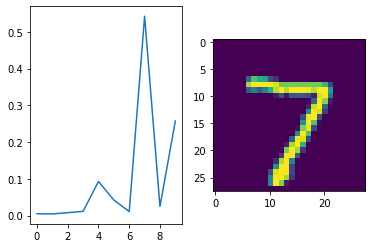

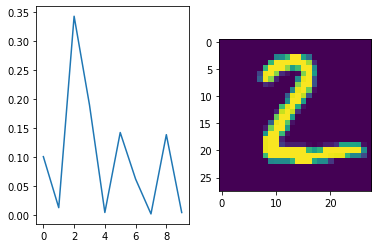

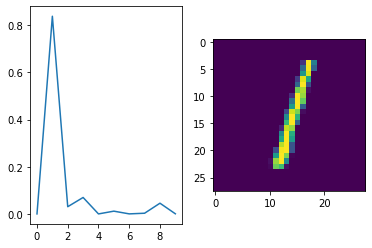

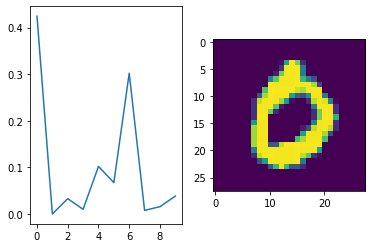

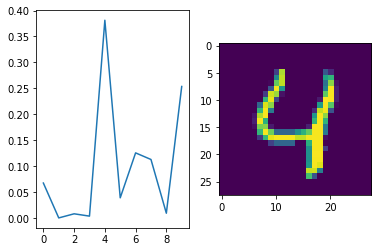

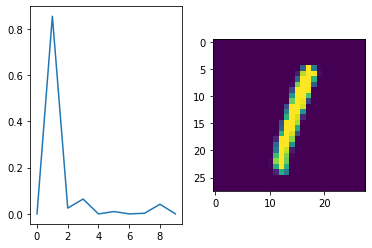

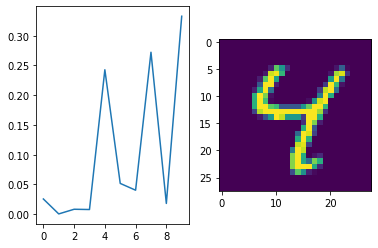

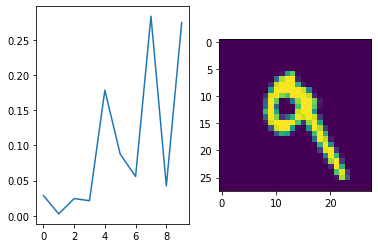

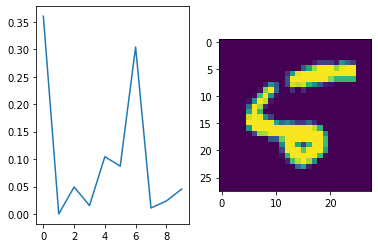

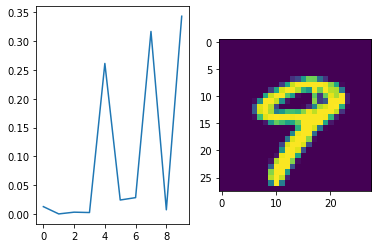

In [24]:
for i in range(10):
    pl.subplot(121)
    pl.plot(pred10[i])
    pl.subplot(122)
    pl.imshow(test_input[i])
    pl.show()

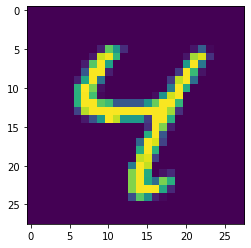

In [25]:
pl.imshow(test_input[firstfail])

Yes, this is probably overfitting. This mistake is not quite as easy to understand outside of overfitting: that clearly looks like a *4* and not a *7* or a *9*. This issue might be something to do with having a (significantly) greater number of neurons than testing objects.